**Importing Libraries**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from joblib import dump, load
from sklearn.pipeline import Pipeline

**Load Dataset**

In [20]:
df = pd.read_csv(r"D:\BINUS\... SEMESTER 4\Research Methodology in Computer Science\AOL\Models\stroke_risk_dataset.csv")

In [21]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


**Data Preprocessing**

In [22]:
df = df.drop(columns=['Stroke Risk (%)'])

In [23]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,1


In [24]:
df.isna().sum()

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
At Risk (Binary)                  0
dtype: int64

In [25]:
correlation = df.corr(method='pearson')
df_corr = correlation['At Risk (Binary)'].sort_values(ascending=False)
print(df_corr)

At Risk (Binary)                  1.000000
Age                               0.612038
Cold Hands/Feet                   0.136642
Chest Pain                        0.135365
Snoring/Sleep Apnea               0.133681
Fatigue & Weakness                0.133060
Excessive Sweating                0.132806
High Blood Pressure               0.132301
Anxiety/Feeling of Doom           0.131466
Shortness of Breath               0.130482
Dizziness                         0.130444
Persistent Cough                  0.128700
Nausea/Vomiting                   0.128645
Irregular Heartbeat               0.124150
Chest Discomfort (Activity)       0.123640
Swelling (Edema)                  0.122416
Pain in Neck/Jaw/Shoulder/Back    0.120280
Name: At Risk (Binary), dtype: float64


**Data Splitting**

In [26]:
X = df.drop(columns=['At Risk (Binary)'])
y = df['At Risk (Binary)']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Resampling (handling the imbalanced classes)

In [28]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

**Feature Scaling**

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [14]:
X_train

array([[ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
        -0.92797721, -1.42409424],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
         1.07761267, -1.04396998],
       [-0.92756638,  1.08395657,  1.08059972, ..., -0.92751504,
         1.07761267,  1.71193094],
       ...,
       [ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
         1.07761267, -0.75887678],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
        -0.92797721, -0.94893891],
       [-0.92756638,  1.08395657, -0.92541205, ..., -0.92751504,
        -0.92797721, -0.04614379]], shape=(72672, 16))

**Modelling**

In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = gnb.predict(X_test)

**Evaluation**

In [15]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print()

Accuracy: 0.9318571428571428

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4892
           1       0.97      0.93      0.95      9108

    accuracy                           0.93     14000
   macro avg       0.92      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000


Confusion Matrix:
[[4618  274]
 [ 680 8428]]



**Hyperparameter Tuning**

In [16]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
}

grid_search = GridSearchCV(GaussianNB(),
                           param_grid,
                           cv=5)

grid_search.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-12)


In [18]:
print(f"Best Params:\n{grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Params:
{'var_smoothing': 1e-12}
Best Score: 0.9441187343874031


In [19]:
best_params = grid_search.best_params_
best_var_smooth = best_params['var_smoothing']

In [22]:
# Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X_train, y_train, cv=5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9441187343874031


**Retraining With Optimal var_smoothing**

In [24]:
gnb_pipe = Pipeline([
    ('gnb', GaussianNB(
        var_smoothing = best_var_smooth
    ))
])

In [25]:
gnb_pipe.fit(X_train, y_train)

Pipeline(steps=[('gnb', GaussianNB(var_smoothing=1e-12))])

In [26]:
y_pred_2 = gnb_pipe.predict(X_test)

**Optimalized Model Performance**

In [27]:
print("===== Optimalized Model Performance =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred_2)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_2)}")
print()

===== Optimalized Model Performance =====
Accuracy: 0.9318571428571428

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4892
           1       0.97      0.93      0.95      9108

    accuracy                           0.93     14000
   macro avg       0.92      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000


Confusion Matrix:
[[4618  274]
 [ 680 8428]]



In [ ]:
# Setelah percobaan hyperparam tuning, ternyata performance sebelum dan sesudahnya sama,
# alias sudah optimal pada percobaan pertama

**Saving Model**

In [ ]:
# Saving Model
dump(gnb_pipe, 'model.joblib')

['model.joblib']

In [30]:
# Loading Saved Model
loaded_model = load('model.joblib')
loaded_scaler = load('scaler.pkl')
y_pred_loaded_model = loaded_model.predict(X_test)

In [31]:
print(y_pred_loaded_model)

[1 0 0 ... 0 0 0]


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(precision_score(y_test, y_pred_loaded_model))
print(recall_score(y_test, y_pred_loaded_model))
print(f1_score(y_test, y_pred_loaded_model))
print(accuracy_score(y_test, y_pred_loaded_model))

0.96851298552057
0.9253403601229688
0.9464345873104997
0.9318571428571428


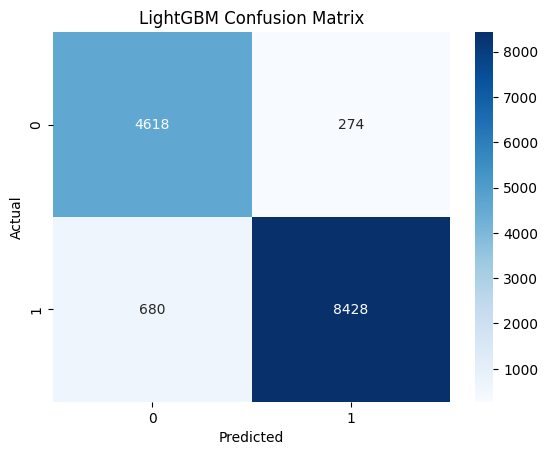

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred_loaded_model), annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()